In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\bi.csv", encoding="latin1")

# Shape of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


#  Data type of each column

In [4]:
df.shape

(77, 11)

# Sample from data

In [5]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


# Detect inconsistent categories


In [6]:
cols = ["country", "gender", "prevEducation"]

# Loop over each column and print unique categories
for col in cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'country':
['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
----------------------------------------
Unique values in 'gender':
['Female' 'M' 'Male' 'F' 'female' 'male']
----------------------------------------
Unique values in 'prevEducation':
['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']
----------------------------------------


In [7]:
df["gender"] = df["gender"].replace({
    "M": "Male",
    "male": "Male",
    "F":"Female",
    "female":"Female"
})


In [8]:
df["country"] = df["country"].replace({
    "norway": "Norway",
    "Norge": "Norway",
})


In [9]:
df["prevEducation"] = (
    df["prevEducation"]
    .str.strip()  
    .str.lower()  
    .replace({
        r"^dip.*": "Diploma",        
        r"^high\s*school$": "High School",  
        r"^ba.*": "Bachelors",    
        r"^masters?$": "Masters",     
        r"^phd$|^doctorate$": "Doctorate"  
    }, regex=True)
)


In [10]:
cols = ["country", "gender", "prevEducation"]

# Loop over each column and print unique categories
for col in cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'country':
['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Denmark' 'Netherlands'
 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
----------------------------------------
Unique values in 'gender':
['Female' 'Male']
----------------------------------------
Unique values in 'prevEducation':
['Masters' 'Diploma' 'High School' 'Bachelors' 'Doctorate']
----------------------------------------


# Deal with Duplicates

In [11]:
df.duplicated().sum()

0

# Deal with Nulls
### Check columns that contain nulls and see if normally distributed or not , if not fill nulls with median as done in Python column

In [12]:
df.isnull().sum()


fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [13]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


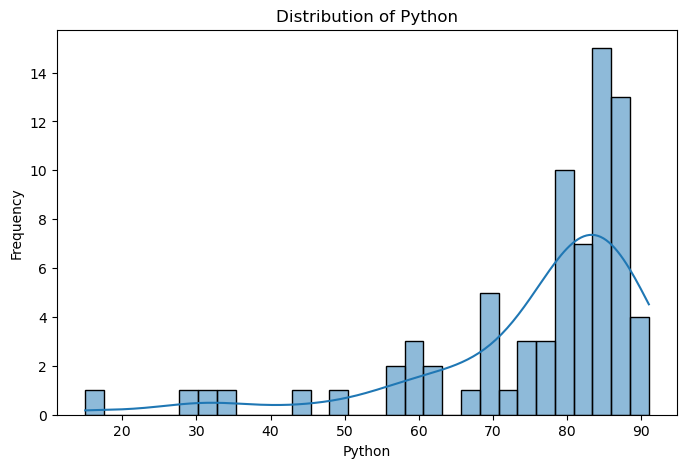

In [14]:
## check if column is normally distributed or not
plt.figure(figsize=(8,5))
sns.histplot(df["Python"].dropna(), kde=True, bins=30)  
plt.title(f"Distribution of Python")
plt.xlabel("Python")
plt.ylabel("Frequency")
plt.show()

In [15]:
## fill with median because column is not normally distributed
imputer = SimpleImputer(strategy="median")
df[["Python"]] = imputer.fit_transform(df[["Python"]])

In [16]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

# Deal with outliers
#### Check max and min of each column with describe() and see if there is values that is not normal or wrong values apply  IQR method.All numerical columns as (python,db,entryexame,studyhours) ,its values are normal even if min in python is very low but still possible value so i prefer to keep then and not deal with outliers even if boxplot shows that some values are larger than max or smaller than min but still possible ,but keep in consideration to use models not affected by outliers as trees

In [17]:
import numpy as np
import pandas as pd

def boxplot_stats(df):
    rows = []
    for col in df.select_dtypes(include=[np.number]).columns:
        s = df[col]  
        q1 = np.percentile(s, 25)
        q3 = np.percentile(s, 75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
       
        rows.append({
            "Column": col,
            "Q1": q1, "Q3": q3,
            "Min (whisker)": lower, "Max (whisker)": upper
            
        })
    return pd.DataFrame(rows)




In [18]:
def visualize_box_plot(col):
    plt.figure(figsize=(7,6))
    sns.boxplot(y=df[col])
    plt.title(f"Box plot for {col} column")
    plt.show

In [19]:
dict= boxplot_stats(df)
dict

,Column,Q1,Q3,Min (whisker),Max (whisker)
0,Age,27.0,42.0,4.5,64.5
1,entryEXAM,69.0,90.0,37.5,121.5
2,studyHOURS,144.0,158.0,123.0,179.0
3,Python,72.0,85.0,52.5,104.5
4,DB,56.0,83.0,15.5,123.5


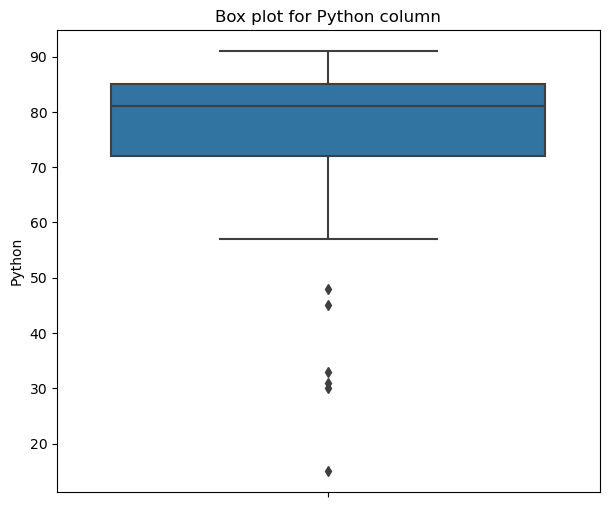

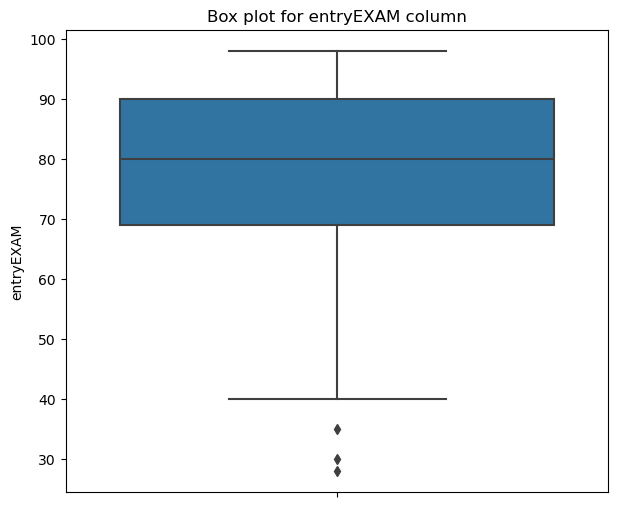

In [20]:
visualize_box_plot("Python")
visualize_box_plot("entryEXAM")

In [21]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.987013,69.467532
std,10.341966,16.475784,12.743272,15.228517,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [22]:
df.to_csv("cleaned_data.csv", index=False) 